In [1]:
import time

import numpy as np

from breakout.MonteCarloControlBreakout import MonteCarloControlBreakout
from breakout.main import play_game_using_mcc
from breakout.game import Game
from breakout.util import read_levels_data_from_csv
import matplotlib.pyplot as plt
from timeit import default_timer as timer

pygame 2.5.0 (SDL 2.28.0, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def  layout_analysis(layout_adress):
    game_def = read_levels_data_from_csv(layout_adress)
    game = Game(game_def[0], game_def[1], game_def[2], reset_means_death_policy=False,reward_offset=10000)
    start = time.time()
    mc = MonteCarloControlBreakout(epsilon = 0.15, gamma = 0.5)
    num_episodes = 10
    episodes = np.arange(0,1000,num_episodes)
    durations_of_solution = [np.zeros(len(episodes)) for i in range(5)]
    num_of_solutions = np.zeros(len(episodes))
    for iter, episode in enumerate(episodes):
        rewards, trajectories = mc.run(num_episodes = num_episodes, game = game)
        print(rewards)
        trajectories_evaluation = mc.evaluation(game=game)
        for speed in range(5):
            durations_of_solution[speed][iter] = len(trajectories_evaluation[speed][0])
        num_of_solutions[iter] = len([durations_of_solution[speed][iter] for speed in range(5) if durations_of_solution[speed][iter] != 0])
    delta = time.time() - start
    #Here we plot all we need
    fig, axs = plt.subplots(2)
    axs[0].set_ylabel('duration of solution')
    for speed in range(5):
        axs[0].semilogy(episodes,durations_of_solution[speed],label = 'ball_speed_x = ' + str(speed-2))
    axs[0].legend(bbox_to_anchor=(1.01, 1.01))
    axs[1].set_xlabel('num of episodes')
    axs[1].set_ylabel('num of found solutions')
    axs[1].plot(episodes,num_of_solutions)
    axs[1].set_ylim([0, 5])
    axs[1].text(500, 1, 'Performance time = ' + str(round(delta,4)) + 's', fontsize = 10)
    plt.show()
    return mc, game, delta

MCC: finished!pisode: 9/10
[8577, 9362, 8556, 9674, 9765, 9725, 9871, 9681, 9701, 9914]
MCC: finished!pisode: 9/10
[9952, 9678, 9564, 9897, 9660, 9727, 9234, 9127, 9602, 9748]
MCC: finished!pisode: 9/10
[9873, 9951, 9693, 9751, 9940, 9952, 9225, 9920, 9602, 9496]
MCC: finished!pisode: 9/10
[9927, 9927, 9789, 9160, 9572, 9766, 9952, 9919, 9937, 9924]
MCC: finished!pisode: 9/10
[9541, 9076, 9801, 9699, 9818, 9776, 9715, 9925, 9763, 9774]
MCC: finished!pisode: 9/10
[9945, 9859, 9795, 9863, 9944, 9879, 9948, 9859, 9834, 9897]
MCC: finished!pisode: 9/10
[9927, 9945, 9804, 9879, 9915, 9939, 9618, 9884, 9482, 9785]
MCC: finished!pisode: 9/10
[9877, 9865, 9926, 9935, 9927, 9882, 9957, 9783, 9779, 9242]
MCC: finished!pisode: 9/10
[9893, 9848, 9852, 9873, 9726, 9854, 9858, 9250, 9829, 9830]
MCC: finished!pisode: 9/10
[9739, 9047, 9927, 9586, 9929, 9908, 9690, 9826, 9939, 9902]
MCC: finished!pisode: 9/10
[9875, 9878, 9883, 9891, 9838, 9764, 9621, 9628, 9902, 9809]
MCC: finished!pisode: 9/10
[9699

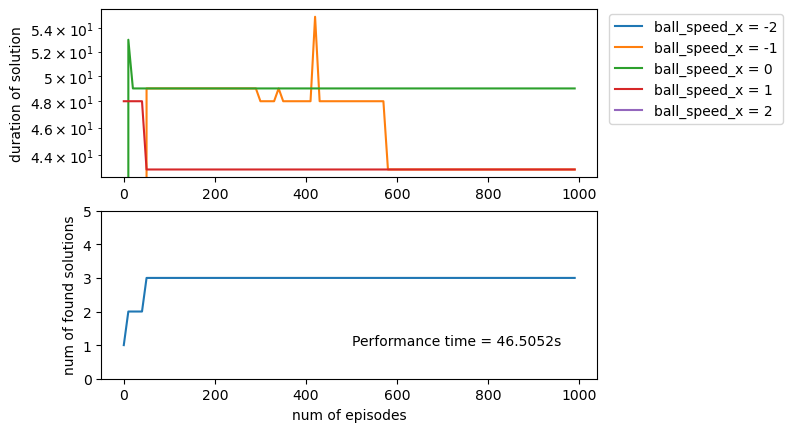

In [3]:
mc1, game1, delta_v1 = layout_analysis('../game_layouts/pyramid/tr_small_13x9_s.csv')

In [6]:
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = 1, out_file='../game_layouts/pyramid/tr_small_13x9_s_speed_1.gif')

MCC: finished!pisode: 9/10
[7103, 9498, 9838, 9251, 9940, 9681, 5068, 9334, 9467, 9842]
MCC: finished!pisode: 9/10
[9478, 9614, 9785, 8967, 9264, 8647, 9430, 9916, 9820, 9024]
MCC: finished!pisode: 9/10
[9381, 9885, 9859, 9561, 9437, 9111, 8960, 9932, 9621, 9394]
MCC: finished!pisode: 9/10
[9816, 9395, 9926, 9745, 9781, 9886, 9855, 9699, 9882, 9890]
MCC: finished!pisode: 9/10
[9896, 9370, 9304, 9424, 9860, 9862, 9806, 9944, 9896, 9932]
MCC: finished!pisode: 9/10
[9377, 9872, 9907, 9411, 9936, 9824, 9942, 9632, 9605, 9923]
MCC: finished!pisode: 9/10
[9670, 9781, 9927, 9857, 9895, 9787, 9460, 9868, 9899, 9885]
MCC: finished!pisode: 9/10
[9712, 9687, 9922, 9763, 9926, 9780, 9869, 9419, 9409, 9440]
MCC: finished!pisode: 9/10
[9896, 9868, 9930, 9934, 9931, 9531, 9426, 9930, 9911, 9905]
MCC: finished!pisode: 9/10
[9944, 9794, 9675, 9935, 9809, 9804, 9922, 9524, 9726, 9528]
MCC: finished!pisode: 9/10
[9934, 9854, 9723, 9317, 9751, 9809, 9846, 9942, 9776, 9931]
MCC: finished!pisode: 9/10
[9939

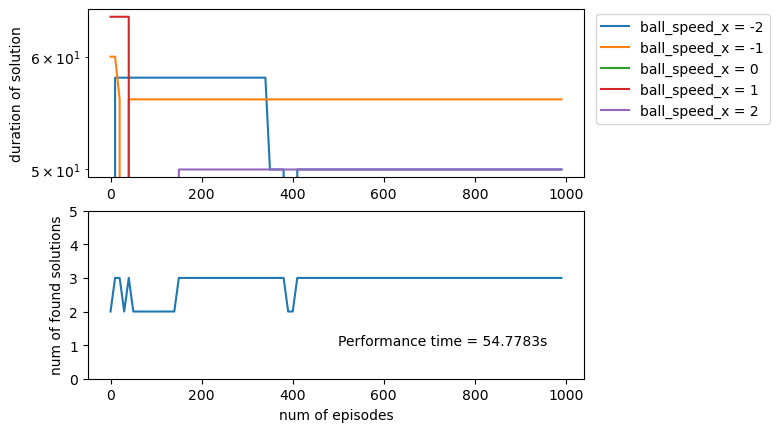

In [8]:
mc2, game2, delta_v2 = layout_analysis('../game_layouts/pyramid/tr_small_13x9_m.csv')

In [11]:
play_game_using_mcc(game2, mc2, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = 2, out_file='../game_layouts/pyramid/tr_small_13x9_m_speed_2.gif')

MCC: finished!pisode: 9/10
[9783, 9873, 1676, 8777, 7321, 4091, 8876, 7534, 9459, 9548]
MCC: finished!pisode: 9/10
[9717, 9773, 9576, 9349, 9413, 9873, 9152, 9591, 9657, 9708]
MCC: finished!pisode: 9/10
[8752, 9050, 9823, 9039, 9714, 9662, 9409, 9386, 9697, 9524]
MCC: finished!pisode: 9/10
[9589, 9369, 8652, 9526, 9809, 9887, 9923, 9109, 9824, 9859]
MCC: finished!pisode: 9/10
[9660, 8846, 9759, 9064, 8873, 8339, 9736, 9442, 9151, 8722]
MCC: finished!pisode: 9/10
[9489, 9850, 9726, 9167, 9821, 9412, 9751, 9424, 9512, 9894]
MCC: finished!pisode: 9/10
[9443, 9495, 9303, 9623, 9823, 9543, 9431, 9712, 9759, 9294]
MCC: finished!pisode: 9/10
[9766, 9504, 9763, 9404, 9245, 8719, 8554, 9818, 9168, 9634]
MCC: finished!pisode: 9/10
[9887, 8898, 9845, 9092, 9887, 9740, 9867, 9051, 9923, 9278]
MCC: finished!pisode: 9/10
[9796, 9754, 9443, 9826, 9839, 9238, 9782, 9572, 9893, 9754]
MCC: finished!pisode: 9/10
[9495, 9678, 9622, 9674, 9819, 9923, 9368, 9916, 9487, 9545]
MCC: finished!pisode: 9/10
[9365

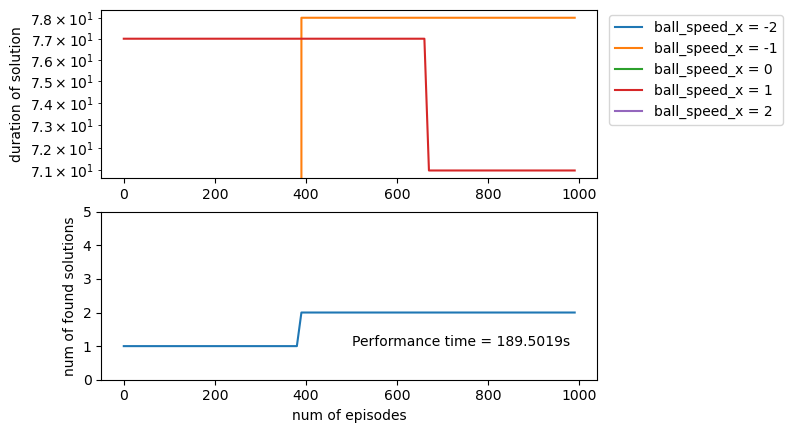

In [12]:
mc3, game3, delta_v3  = layout_analysis('../game_layouts/pyramid/tr_small_13x9_l.csv')

In [15]:
play_game_using_mcc(game3, mc3, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = 1, out_file='../game_layouts/pyramid/tr_small_13x9_l_speed_1.gif')

In [ ]:
print("TIMES:")
print("5b:" + str(delta_v1))
print("10b:" + str(delta_v2))
print("15b:" + str(delta_v3))

In [ ]:
# plt.plot(-np.array(rewards_v1) + 10000)
# plt.plot(-np.array(rewards_v2) + 10000)
# plt.plot(-np.array(rewards_v3) + 10000)
# plt.ylabel('some numbers')
# plt.semilogy()
# plt.show()